# **MATRIX CHAIN MULTIPLICATION**



---

Matrix Chain Multiplication is a classic optimization problem in computer science, where you have a sequence of matrices, and you want to find the most efficient way to multiply these matrices to minimize the total number of scalar multiplications. The problem can be solved using dynamic programming.

**Problem Statement:**
Given a sequence of matrices with dimensions `A1 x A2, A2 x A3, A3 x A4, ... An-1 x An`, you need to find the optimal way to parenthesize them for multiplication, such that the total number of scalar multiplications is minimized.

**Approach:**

1. Create a table `m` of size `(n+1) x (n+1)` where `n` is the number of matrices. `m[i][j]` will represent the minimum number of scalar multiplications needed to multiply matrices from `i` to `j`.

2. Initialize the diagonal elements of the `m` table to 0 because a single matrix requires no multiplications.

3. Fill in the `m` table using a bottom-up dynamic programming approach. For each subproblem, find the split point `k` to parenthesize the matrices into two parts and compute the minimum number of multiplications.

4. Track the split points in another table `s` to reconstruct the optimal parenthesization.

5. Finally, use the `s` table to parenthesize the matrices optimally.

## **Python Implementation:**



In [1]:
def matrix_chain_multiplication(dims):
    n = len(dims) - 1  # Number of matrices
    m = [[0] * (n + 1) for _ in range(n + 1)]
    s = [[0] * (n + 1) for _ in range(n + 1)]

    for chain_length in range(2, n + 1):
        for i in range(1, n - chain_length + 2):
            j = i + chain_length - 1
            m[i][j] = float('inf')
            for k in range(i, j):
                cost = m[i][k] + m[k + 1][j] + dims[i - 1] * dims[k] * dims[j]
                if cost < m[i][j]:
                    m[i][j] = cost
                    s[i][j] = k

    return m[1][n], s

def print_optimal_parenthesization(s, i, j):
    if i == j:
        print(f'A{i}', end='')
    else:
        print('(', end='')
        print_optimal_parenthesization(s, i, s[i][j])
        print_optimal_parenthesization(s, s[i][j] + 1, j)
        print(')', end='')

# Example usage:
matrix_dimensions = [10, 30, 5, 60]
min_scalar_mults, split_points = matrix_chain_multiplication(matrix_dimensions)
print(f"Minimum Scalar Multiplications: {min_scalar_mults}")
print("Optimal Parenthesization: ", end='')
print_optimal_parenthesization(split_points, 1, len(matrix_dimensions) - 1)


Minimum Scalar Multiplications: 4500
Optimal Parenthesization: ((A1A2)A3)


This code calculates the minimum number of scalar multiplications required for matrix chain multiplication and provides the optimal parenthesization.

# **Time and Space complexity:**


In [6]:
import matplotlib.pyplot as plt
import timeit
import random
import sys

def matrix_chain_multiplication(dims):
    n = len(dims) - 1
    m = [[0] * (n + 1) for _ in range(n + 1)]
    s = [[0] * (n + 1) for _ in range(n + 1)]

    for chain_length in range(2, n + 1):
        for i in range(1, n - chain_length + 2):
            j = i + chain_length - 1
            m[i][j] = sys.maxsize
            for k in range(i, j):
                cost = m[i][k] + m[k + 1][j] + dims[i - 1] * dims[k] * dims[j]
                if cost < m[i][j]:
                    m[i][j] = cost
                    s[i][j] = k

    return m[1][n], s

def measure_time_and_space(dims):
    time_taken = timeit.timeit(lambda: matrix_chain_multiplication(dims), number=1)
    space_used = sys.getsizeof(dims)  # Rough estimate of space used
    return time_taken, space_used

n_values = [5, 10, 15, 20, 25]  # Different matrix dimensions
time_complexity = []
space_complexity = []

for n in n_values:
    dims = [random.randint(1, 100) for _ in range(n + 1)]
    time_taken, space_used = measure_time_and_space(dims)
    time_complexity.append(time_taken)
    space_complexity.append(space_used)




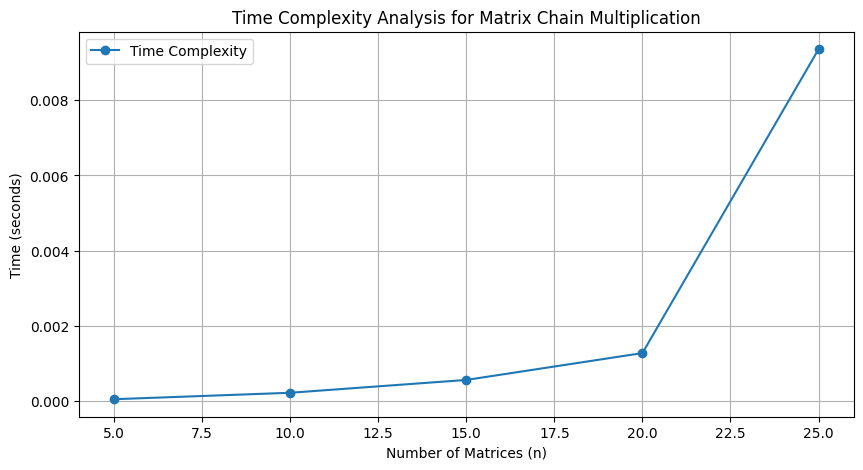

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(n_values, time_complexity, marker='o', label='Time Complexity')
plt.xlabel('Number of Matrices (n)')
plt.ylabel('Time (seconds)')
plt.title('Time Complexity Analysis for Matrix Chain Multiplication')
plt.legend()
plt.grid()


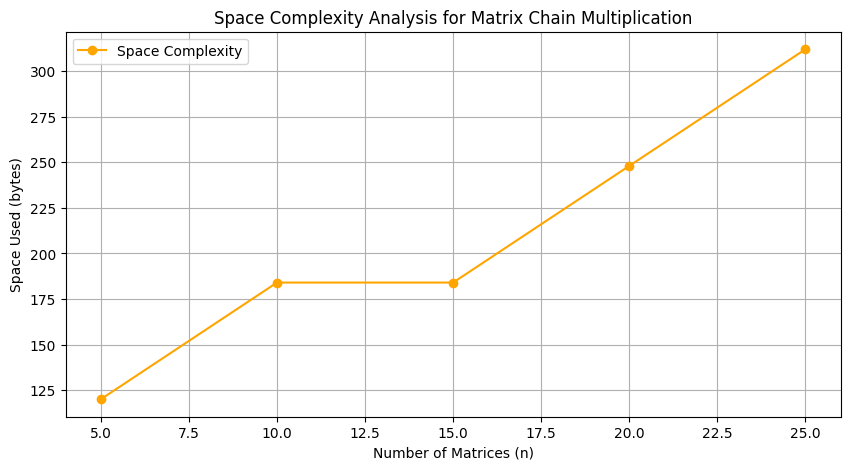

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(n_values, space_complexity, marker='o', color='orange', label='Space Complexity')
plt.xlabel('Number of Matrices (n)')
plt.ylabel('Space Used (bytes)')
plt.title('Space Complexity Analysis for Matrix Chain Multiplication')
plt.legend()
plt.grid()

plt.show()